In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

trades = pd.read_csv('/content/drive/MyDrive/ds_Vishal Adithya/csv_files/historical_data.csv')
sentiment = pd.read_csv('/content/drive/MyDrive/ds_Vishal Adithya/csv_files/fear_greed_index.csv')

In [11]:
trades['Timestamp'].head()

,Timestamp
0,1.730000e+12
1,1.730000e+12
2,1.730000e+12
3,1.730000e+12
4,1.730000e+12


In [12]:
trades['timestamp'] = pd.to_datetime(trades['Timestamp'], unit='ms')
trades['date'] = trades['timestamp'].dt.strftime('%Y-%m-%d')

sentiment['date'] = pd.to_datetime(sentiment['date']).dt.strftime('%Y-%m-%d')

In [13]:
merged = trades.merge(sentiment[['date','classification']], on='date', how='inner')

In [19]:
merged.shape

(184263, 19)

In [20]:
merged[['date','classification']].head()

,date,classification
0,2024-10-27,Greed
1,2024-10-27,Greed
2,2024-10-27,Greed
3,2024-10-27,Greed
4,2024-10-27,Greed


In [21]:
merged.to_csv('/content/drive/MyDrive/ds_Vishal Adithya/csv_files/merged_data.csv', index=False)

NORMALIZE COLUMNS

In [29]:
merged.columns = (
    merged.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

In [30]:
merged.columns

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp', 'timestamp', 'date', 'classification', 'profit', 'abs_pnl',
       'risk', 'trade'],
      dtype='object')

TRADER BEHAVIOUR METRICS

In [31]:
merged['profit'] = merged['closed_pnl'] > 0
merged['abs_pnl'] = merged['closed_pnl'].abs()
merged['risk'] = merged['size_usd']
merged['trade'] = 1

In [32]:
merged[['closed_pnl','size_usd','classification']].head()

,closed_pnl,size_usd,classification
0,0.0,7872.16,Greed
1,0.0,127.68,Greed
2,0.0,1150.63,Greed
3,0.0,1142.04,Greed
4,0.0,69.75,Greed


CORE MARKET BEHAVIOUR COMPARISON

In [33]:
merged.groupby('classification')['closed_pnl'].mean()
merged.groupby('classification')['risk'].mean()
merged.groupby('classification')['trade'].sum()
merged.groupby('classification')['profit'].mean()

,profit
classification,
Extreme Greed,0.490089
Fear,0.415146
Greed,0.446471
Neutral,0.317182


In [34]:
merged.groupby('classification')['closed_pnl'].mean()
merged.groupby('classification')['risk'].mean()

,risk
classification,
Extreme Greed,5660.265764
Fear,5259.977837
Greed,3182.883845
Neutral,3058.848110


VISUALIZATION

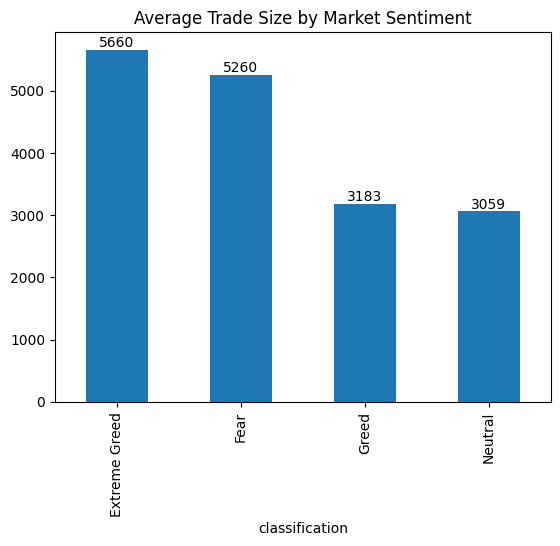

In [36]:
import matplotlib.pyplot as plt

ax = merged.groupby('classification')['risk'].mean().plot(kind='bar')
plt.title('Average Trade Size by Market Sentiment')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.savefig('/content/drive/MyDrive/ds_Vishal Adithya/outputs/risk.png', bbox_inches='tight')
plt.show()

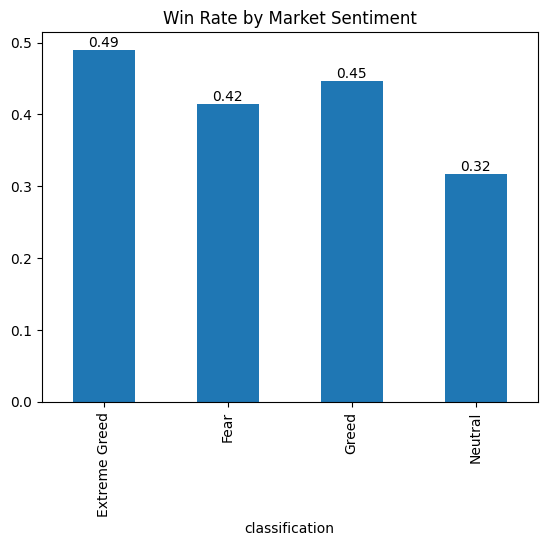

In [37]:
ax = merged.groupby('classification')['profit'].mean().plot(kind='bar')
plt.title('Win Rate by Market Sentiment')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.savefig('/content/drive/MyDrive/ds_Vishal Adithya/outputs/winrate.png', bbox_inches='tight')
plt.show()

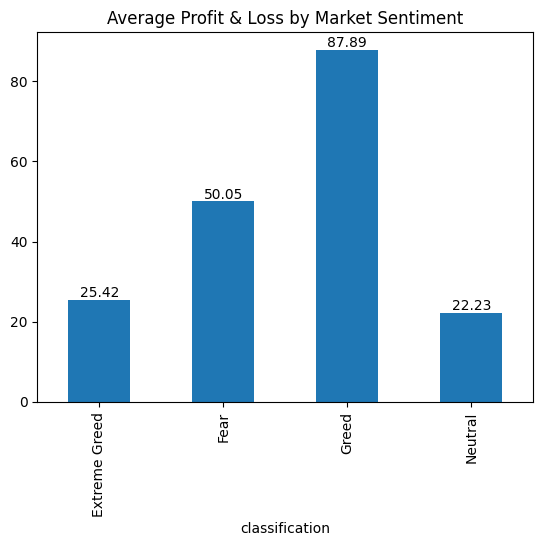

In [38]:
ax = merged.groupby('classification')['closed_pnl'].mean().plot(kind='bar')
plt.title('Average Profit & Loss by Market Sentiment')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.savefig('/content/drive/MyDrive/ds_Vishal Adithya/outputs/pnl.png', bbox_inches='tight')
plt.show()

In [39]:
sample = merged.sample(5000, random_state=42)
sample.to_csv('/content/drive/MyDrive/ds_Vishal Adithya/csv_files/sample_dataset.csv', index=False)